# Imports

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader


from CnnAlgoClass.AlexNet import AlexNet
from CnnAlgoClass.LoadData import LoadData
from CnnAlgoClass.Utils import imshow, modelTrain, modelAccurcy, saveModel, loadModel
from CnnAlgoClass.Similarity import extract_imgsFeatures, product_similatity, imgs_names, similar_products
from CnnAlgoClass.VGGnets import VGG

In [2]:
data_csv='/home/Data/style/style.csv'
pictures_location='/home/Data/style'
GPU_val=True
model_path_save='/home/models/VGGnet_Adam.pth'

# Data transformation

In [3]:
tf = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = LoadData(csv_file=data_csv, root_dir=pictures_location, transform = tf)

train_set, test_set = torch.utils.data.random_split(dataset, [1780, 404])

train_loader = DataLoader(dataset=train_set, batch_size=20, shuffle=True)
test_loader = DataLoader(dataset=test_set, batch_size=20, shuffle=True)

classes = ('shoes', 'lipstick', 'handbag', 'nail polish', 'necklace', 'watches', 'ring', 'bracelet', 'boots', 'earrings')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


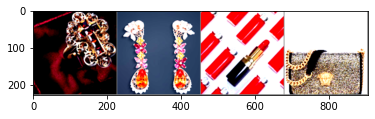

 ring -|- earrings -|- lipstick -|- handbag -|-


In [4]:
dataiter = iter(train_loader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images[:4]))
print(' '.join('%5s -|-' % classes[labels[j]] for j in range(4)))

# Model training

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
images, labels = images.to(device), labels.to(device)
print(device)

cuda


In [6]:
VGG = VGG().to(device)
optimizer = torch.optim.Adam(VGG.parameters(), lr=0.001)
criterion = torch.nn.CrossEntropyLoss()

In [7]:
if torch.cuda.is_available():
    VGG.cuda()

In [8]:
modelTrain(VGG, train_loader, optimizer, criterion, epoch=10,GPU=GPU_val)

--- Training started ---
epoch: 1 loss: 2.2438
epoch: 2 loss: 1.8506
epoch: 3 loss: 1.5279
epoch: 4 loss: 1.3609
epoch: 5 loss: 1.0874
epoch: 6 loss: 0.9755
epoch: 7 loss: 0.8713
epoch: 8 loss: 0.6994
epoch: 9 loss: 0.5481
epoch: 10 loss: 0.4820
--- Finished Training ---


In [9]:
PATH = model_path_save
saveModel(VGG, PATH)

'Model saved successfully'

# Model Loading

In [18]:
VGG = VGG()
PATH = model_path_save
loadModel(VGG, PATH)

TypeError: forward() missing 1 required positional argument: 't'

# Model Testing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


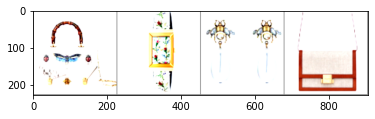

Vrai::  handbag watches earrings handbag


In [10]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
# print images
imshow(torchvision.utils.make_grid(images[:4]))
print('Vrai:: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
images = images.to(device)
outputs = VGG(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

Predicted:  handbag nail polish earrings handbag


In [12]:
modelAccurcy(VGG, test_loader, classes,GPU=GPU_val)

----- Accuracy for each class ----
- shoes : 86.57 %
- lipstick : 65.91 %
- handbag : 91.76 %
- nail polish : 53.57 %
- necklace : 63.33 %
- watches : 51.72 %
-  ring : 53.85 %
- bracelet : 40.00 %
- boots : 74.19 %
- earrings : 67.74 %
--------------------------------------------------
Accuracy of the network on the test images: 71.04 %


# Model accuracy

# Similar Product

## - Load Data

In [4]:
tf = transforms.Compose([
  transforms.Resize(256),
  transforms.CenterCrop(224),
  transforms.ToTensor(),
  transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

dataset = LoadData(csv_file='/home/Data/style/style.csv', root_dir='/home/Data/style', transform = tf)
data_loader = DataLoader(dataset=dataset)

## - Laod Model

In [5]:
VGG = VGG()
PATH = 'models/VGGnet_Adam.pth'
loadModel(VGG, PATH)

'Model loaded successfully'

In [6]:
if torch.cuda.is_available():
    VGG.cuda()

In [7]:
VGG

VGG(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv6): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv7): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv8): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=25088, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=10, bias=True)
)

## - Extract features of Images

In [8]:
imgs_features = extract_imgsFeatures(VGG, data_loader,GPU=GPU_val)

print("features successfully extracted!!")
imgs_features.shape

features successfully extracted!


(2184, 512)

## - Compute Similarities

In [9]:
df_cosSim = product_similatity(imgs_features, imgsFile_path="Data/style/", csvFileName="CosSimilarity_VGG11")

File saved successfully in similarity_csv/CosSimilarity_VGG11.csv


In [10]:
df_cosSim.head()

,0_0_001.png,0_0_002.png,0_0_003.png,0_0_004.png,0_0_005.png,0_0_006.png,0_0_007.png,0_0_008.png,0_0_009.png,0_0_010.png,...,6_1_034.png,6_1_035.png,6_1_036.png,6_1_037.png,6_1_038.png,6_1_039.png,6_1_040.png,6_1_041.png,6_9_020.png,6_9_021.png
0_0_001.png,1.000000,0.769225,0.639153,0.871743,0.581011,0.799390,0.670467,0.853247,0.708383,0.476712,...,0.376178,0.319884,0.525972,0.352900,0.341948,0.296718,0.366311,0.303871,0.366364,0.322251
0_0_002.png,0.769225,1.000000,0.854288,0.880254,0.849460,0.540971,0.755079,0.551528,0.631587,0.358417,...,0.372588,0.442581,0.438173,0.448389,0.414371,0.482928,0.412127,0.495596,0.268067,0.489810
0_0_003.png,0.639153,0.854288,1.000000,0.846458,0.960056,0.403224,0.861678,0.362306,0.539994,0.346012,...,0.233891,0.381061,0.395384,0.329560,0.299117,0.382148,0.336051,0.367632,0.214375,0.393335
0_0_004.png,0.871743,0.880254,0.846458,1.000000,0.805564,0.611603,0.805267,0.624299,0.696875,0.487511,...,0.377374,0.413269,0.570376,0.410004,0.381368,0.416771,0.465304,0.411550,0.333512,0.431043
0_0_005.png,0.581011,0.849460,0.960056,0.805564,1.000000,0.337702,0.807418,0.309989,0.492526,0.319084,...,0.257098,0.417744,0.409015,0.369751,0.330581,0.445748,0.376614,0.433992,0.222766,0.450581


## - Most similar products

In [ ]:
#import pandas as pd
#df_cosSim = pd.read_csv("similarity_csv/CosSimilarity_AlexAdam.csv", index_col=[0])
#df_cosSim.set_index(df_cosSim.columns)
#df_cosSim.head()

In [11]:
imgs_names = imgs_names("Data/style/")
imgs_names[:10]

['0_0_001.png',
 '0_0_002.png',
 '0_0_003.png',
 '0_0_004.png',
 '0_0_005.png',
 '0_0_006.png',
 '0_0_007.png',
 '0_0_008.png',
 '0_0_009.png',
 '0_0_010.png']

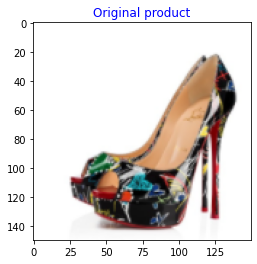

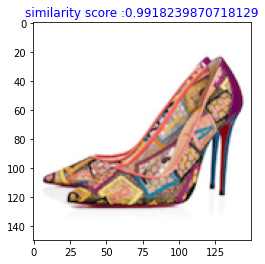

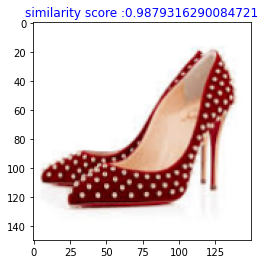

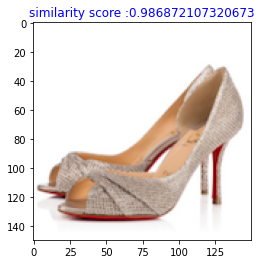

In [12]:
similar_products(df_cosSim, imgs_names[0], 3)